### 1. 라이브러리 호출

In [1]:
import pandas as pd      
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression      # 선형회귀
from sklearn.ensemble import RandomForestRegressor     # 랜덤포레스트
%matplotlib inline
warnings.simplefilter("ignore")

### 2. 데이터 셋 구성하기

#### 1) 데이터 불러오기

In [2]:
train = pd.read_csv("C:/Users/user13/Documents/Study/따릉이/train.csv")
test = pd.read_csv("C:/Users/user13/Documents/Study/따릉이/test.csv")
submission = pd.read_csv("C:/Users/user13/Documents/Study/따릉이/submission.csv")

#### 2) 데이터 확인

In [3]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [4]:
train.shape, test.shape, submission.shape

((1459, 11), (715, 10), (715, 2))

### 3. EDA (탐색적 자료분석)

#### 1) 선 그래프
* 8시, 18시 사용량이 늘어남.
* 낮 시간대 사용량이 대체적으로 많음.
* 4~5시 사용량이 가장 적음.

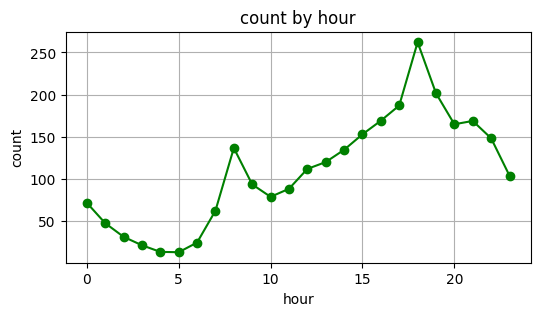

In [5]:
plt.figure(figsize=(6,3))
plt.plot(train.groupby('hour').mean()['count'],'go-')
plt.grid()

plt.title("count by hour")
plt.xlabel("hour") 
plt.ylabel('count')

plt.show()

#### 2) 상관관계 분석 & 히트맵

In [6]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


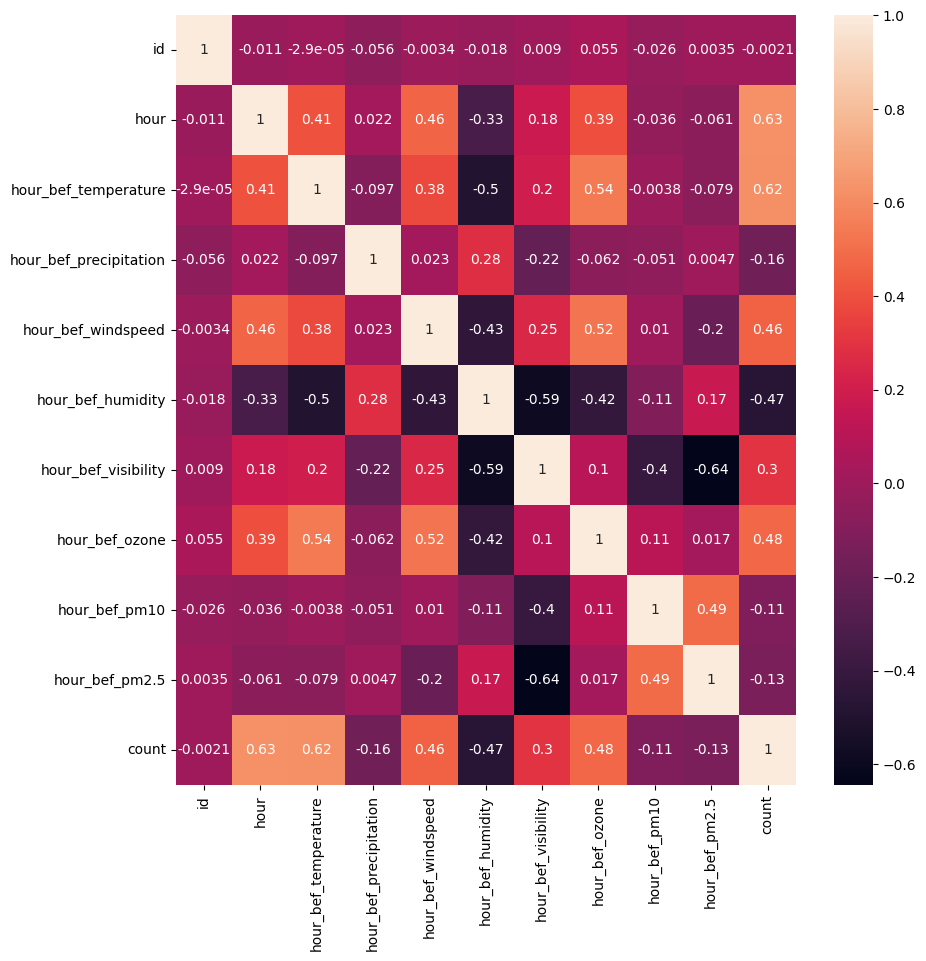

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True)

plt.show()

### 3. 전처리

#### 1) 결측치 처리
* hour_bef_precipitation : 최빈값(0)으로 처리
* 나머지 열 : 평균값으로 처리

In [8]:
# train 데이터셋 결측치 처리
train['hour_bef_precipitation'].fillna('0', inplace=True)
train.fillna(train.mean(), inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1459 non-null   object 
 4   hour_bef_windspeed      1459 non-null   float64
 5   hour_bef_humidity       1459 non-null   float64
 6   hour_bef_visibility     1459 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1459 non-null   float64
 9   hour_bef_pm2.5          1459 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 125.5+ KB


In [9]:
# test 데이터셋 결측치 처리
test['hour_bef_precipitation'].fillna('0', inplace=True)
test.fillna(test.mean(), inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    715 non-null    float64
 3   hour_bef_precipitation  715 non-null    object 
 4   hour_bef_windspeed      715 non-null    float64
 5   hour_bef_humidity       715 non-null    float64
 6   hour_bef_visibility     715 non-null    float64
 7   hour_bef_ozone          715 non-null    float64
 8   hour_bef_pm10           715 non-null    float64
 9   hour_bef_pm2.5          715 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 56.0+ KB


#### 3) 변수 정의

In [10]:
x_train = train.drop(['id','count'], axis=1)
y_train = train['count']
x_test = test.drop(['id'], axis=1)

In [11]:
x_train.shape, y_train.shape, x_test.shape

((1459, 9), (1459,), (715, 9))

### 3. 학습

#### 1) LinearRegression

In [12]:
# 모델 생성
model = LinearRegression()

# 학습
model.fit(x_train, y_train)

# 예측값
y_pred_LR = model.predict(x_test)

#### 2) RandomForestRegressor

In [13]:
# 모델 생성
model100 = RandomForestRegressor(n_estimators=100, random_state=0)
model150 = RandomForestRegressor(n_estimators=150, random_state=0)
model200 = RandomForestRegressor(n_estimators=200, random_state=0)

# 모델 학습
model100.fit(x_train, y_train)
model150.fit(x_train, y_train)
model200.fit(x_train, y_train)

# 예측값
y_pred_RF100 = model100.predict(x_test)
y_pred_RF150 = model150.predict(x_test)
y_pred_RF200 = model200.predict(x_test)

### 4. 결과

In [14]:
submission['count'] = (y_pred_LR + y_pred_RF100 + y_pred_RF150 + y_pred_RF200) / 4
submission

,id,count
0,0,93.649568
1,1,223.494035
2,2,70.715953
3,4,49.658662
4,5,80.477819
...,...,...
710,2148,73.939263
711,2149,71.308178
712,2165,128.012902
713,2166,165.940635
